## Machine learning flowers

In [3]:
# Import packages
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = read_csv(url, names=names)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Shape of dataset
df.shape

(150, 5)

In [6]:
# General info of dataset
df.info

<bound method DataFrame.info of      sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [7]:
# Statistical values in the dataset 
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Distribution (quantity) for each class
df.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

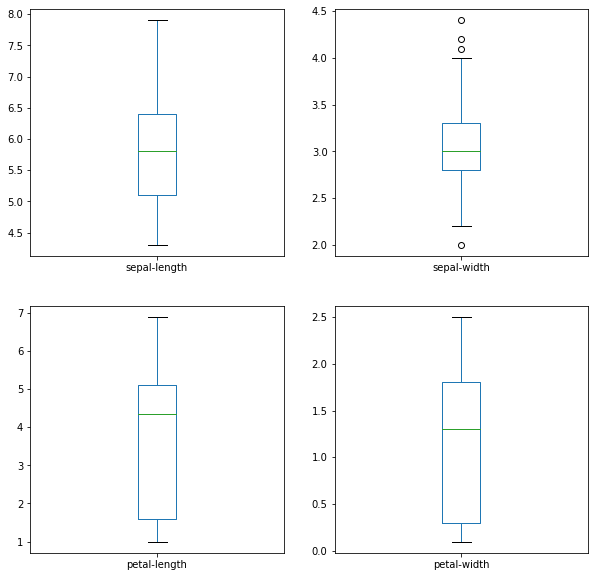

In [9]:
# Visualization with boxes
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,10))
pyplot.show()

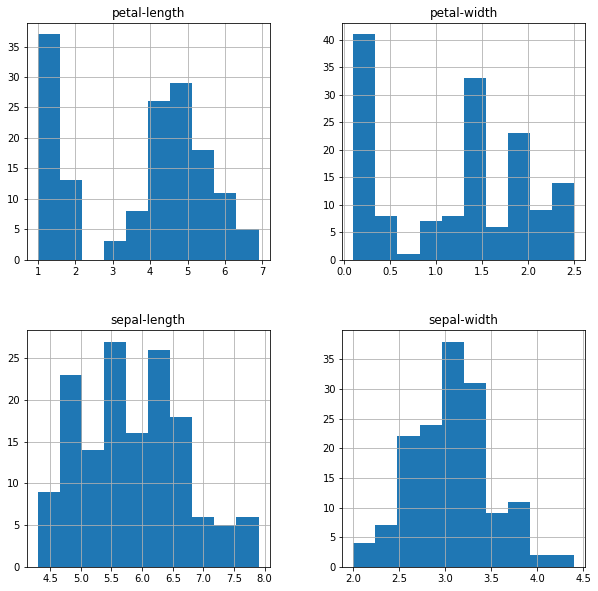

In [10]:
# Visualizzation by histogram
df.hist(figsize=(10,10))
pyplot.show()

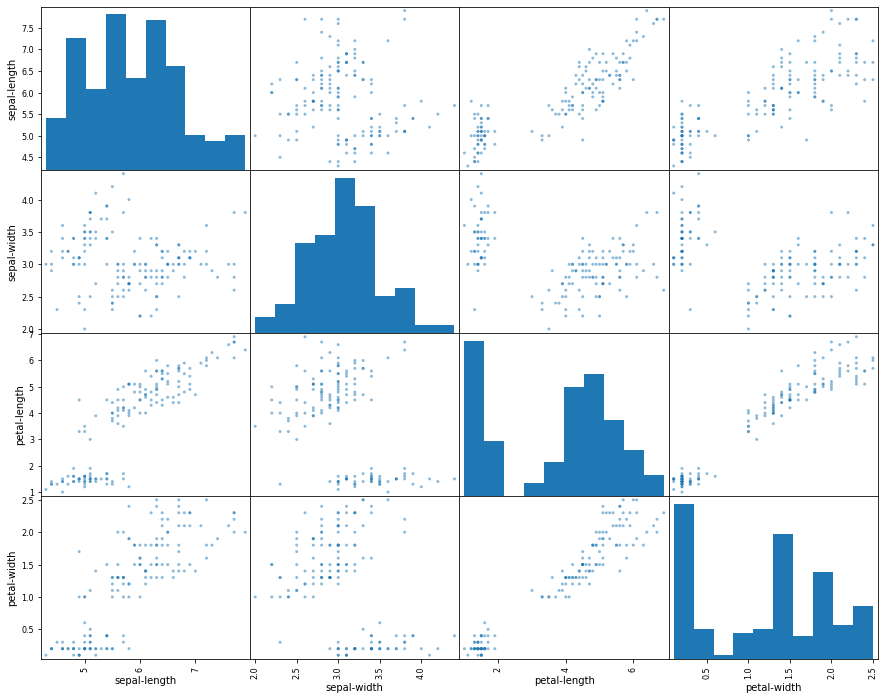

In [11]:
# Visualization by scatter plot matrix
scatter_matrix(df, figsize=(15,12))
pyplot.show()

In [12]:
### Train & Test Split ###

# Converting df into np array
array = df.values
# Define variables
X = array[:,0:4]
y = array[:,4]
# Train & Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Print splitting's results
print("Train set:", X_train.shape, y_train.shape[0])
print("Test set:", X_test.shape, y_test.shape[0])

Train set: (120, 4) 120
Test set: (30, 4) 30


In [13]:
# Spot check Models 
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [17]:
# Evaluate which model in turn through loop
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNC: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


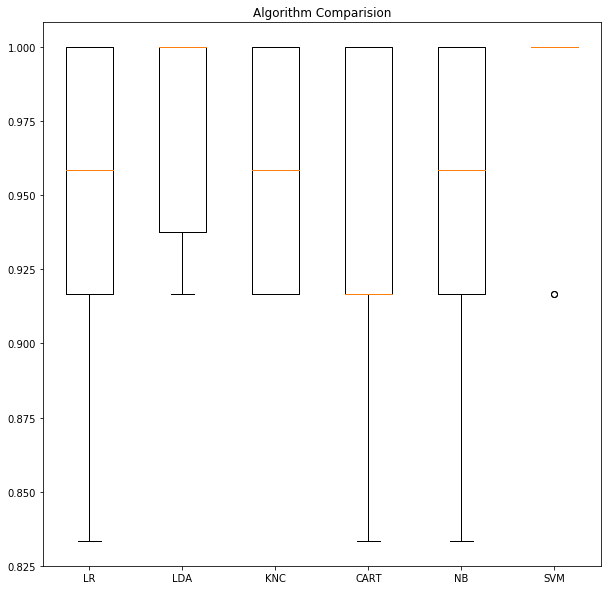

In [21]:
# Compare algorithms
pyplot.figure(figsize=(10,10))
pyplot.boxplot(results, labels=names)
pyplot.title("Algorithm Comparision")
pyplot.show()

In [23]:
# Modeling/Fitting/Transforming X/y_trainset by KERNEL with the default is RBF (Radial Basis Function)
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
# Prediction SVM (Support Vector Machines of X/y_train) in function to X test(features/indipendent)
Yhat = model.predict(X_test)
Yhat[0:5]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [26]:
# Evaluation SVM Prediction in function to y_test(target/dependent variable)
print(accuracy_score(y_test, Yhat))
print(confusion_matrix(y_test, Yhat))
print(classification_report(y_test, Yhat))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
import itertools
def plot_confusion_matrix (cm, classes,
                           normalize=False, 
                           title= 'Confusion matrix',
                          cmap=pyplot.cm.Greens):
    if normalize: 
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else: 
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    
    